# Libraries

In [1]:
# Install necessary packages
%pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn tensorflow xgboost tensorflow_decision_forests wurlitzer

Note: you may need to restart the kernel to use updated packages.


In [2]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler,PolynomialFeatures,RobustScaler
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score,precision_score, recall_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import tensorflow_decision_forests as tfdf
from wurlitzer import sys_pipes

/tmp/ipykernel_61949/2032056911.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-07 15:08:00.987929: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 15:08:01.147561: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 15:08:01.148002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin

# Linear Regression Models

In [3]:
X_NF=pd.read_csv('../Data/Clean-Data/Dataset_without_Feature_engineering/X_train.csv')
X_val_NF=pd.read_csv('../Data/Clean-Data/Dataset_without_Feature_engineering/X_validation.csv')
y_NF=pd.read_csv('../Data/Clean-Data/Dataset_without_Feature_engineering/y_train.csv')
y_val_NF=pd.read_csv('../Data/Clean-Data/Dataset_without_Feature_engineering/y_validation.csv')

X_F=pd.read_csv('../Data/Clean-Data/Dataset_with_feature_engineering/X_train.csv')
X_val_F=pd.read_csv('../Data/Clean-Data/Dataset_with_feature_engineering/X_validation.csv')
y_F=pd.read_csv('../Data/Clean-Data/Dataset_with_feature_engineering/y_train.csv')
y_val_F=pd.read_csv('../Data/Clean-Data/Dataset_with_feature_engineering/y_validation.csv')

### Without Feature Engineering

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_NF, y_NF, test_size=0.2, random_state=42)

LinearRegression_pipeline_NF = make_pipeline(RobustScaler(),LinearRegression())

cv_scores = cross_val_score(LinearRegression_pipeline_NF, X_train, y_train, cv=10)

LinearRegression_pipeline_NF.fit(X_train, y_train)

y_pred_continuous = LinearRegression_pipeline_NF.predict(X_test)

# Get the fpr and tpr values from the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

# Calculate F1-score for each threshold
f1_scores = [f1_score(y_test, (y_pred_continuous > thr).astype(int)) for thr in thresholds]

# Find the threshold that maximizes F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

# Convert predictions to binary using the best threshold
y_pred_binary = (y_pred_continuous > best_threshold).astype(int)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_continuous)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)


# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.3469387755102041
Recall: 0.6455696202531646
F1 Score: 0.45132743362831856
Accuracy: 0.7677902621722846


Saving Model

In [5]:
model_filename = './Saved-Model/Linear-Models/linear_regression_model_NF.joblib'
joblib.dump(LinearRegression_pipeline_NF, model_filename)

model_info = pd.DataFrame({
    'ModelName': [model_filename],
    'Threshold': [best_threshold]
})

csv_filename = './Saved-Model/Linear-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='w', index=False)

### With Feature Enginerring

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_F, y_F, test_size=0.2, random_state=42)

LinearRegression_pipeline_F = make_pipeline(PolynomialFeatures(degree=2),RobustScaler(),LinearRegression())

cv_scores = cross_val_score(LinearRegression_pipeline_F, X_train, y_train, cv=10)

LinearRegression_pipeline_F.fit(X_train, y_train)

y_pred_continuous = LinearRegression_pipeline_F.predict(X_test)

# Get the fpr and tpr values from the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

# Calculate F1-score for each threshold
f1_scores = [f1_score(y_test, (y_pred_continuous > thr).astype(int)) for thr in thresholds]

# Find the threshold that maximizes F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

# Convert predictions to binary using the best threshold
y_pred_binary = (y_pred_continuous > best_threshold).astype(int)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_continuous)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.8848920863309353
Recall: 0.8870192307692307
F1 Score: 0.885954381752701
Accuracy: 0.8958333333333334


Saving Model

In [7]:
model_filename = './Saved-Model/Linear-Models/linear_regression_model_F.joblib'
joblib.dump(LinearRegression_pipeline_F, model_filename)

model_info = pd.DataFrame({
    'ModelName': [model_filename],
    'Threshold': [best_threshold]
})

csv_filename = './Saved-Model/Linear-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='a', index=False,header=False)

# Gradient Decent for Linear Regression Models

### Without Feature Engineering

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_NF, y_NF, test_size=0.2, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

SGDRegressor_pipeline_NF = make_pipeline(RobustScaler(),SGDRegressor(max_iter=1000,learning_rate = 'adaptive',alpha=0.1))

cv_scores = cross_val_score(SGDRegressor_pipeline_NF, X_train, y_train, cv=3)

SGDRegressor_pipeline_NF.fit(X_train, y_train)

y_pred_continuous = SGDRegressor_pipeline_NF.predict(X_test)

# Get the fpr and tpr values from the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

# Calculate F1-score for each threshold
f1_scores = [f1_score(y_test, (y_pred_continuous > thr).astype(int)) for thr in thresholds]

# Find the threshold that maximizes F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

# Convert predictions to binary using the best threshold
y_pred_binary = (y_pred_continuous > best_threshold).astype(int)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_continuous)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.35714285714285715
Recall: 0.6329113924050633
F1 Score: 0.45662100456621
Accuracy: 0.7771535580524345


Saving Model

In [9]:
model_filename = './Saved-Model/Linear-Models/gradient_regression_model_NF.joblib'
joblib.dump(SGDRegressor_pipeline_NF, model_filename)

model_info = pd.DataFrame({
    'ModelName': [model_filename],
    'Threshold': [best_threshold]
})

csv_filename = './Saved-Model/Linear-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='a', index=False,header=False)

### With Feature Engineering

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_F, y_F, test_size=0.2, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

SGDRegressor_pipeline_F = make_pipeline(PolynomialFeatures(degree=1),RobustScaler(),SGDRegressor(max_iter=1000, learning_rate = 'adaptive', alpha=0.1))

cv_scores = cross_val_score(SGDRegressor_pipeline_F, X_train, y_train, cv=3)

SGDRegressor_pipeline_F.fit(X_train, y_train)

y_pred_continuous = SGDRegressor_pipeline_F.predict(X_test)

# Get the fpr and tpr values from the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

# Calculate F1-score for each threshold
f1_scores = [f1_score(y_test, (y_pred_continuous > thr).astype(int)) for thr in thresholds]

# Find the threshold that maximizes F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

# Convert predictions to binary using the best threshold
y_pred_binary = (y_pred_continuous > best_threshold).astype(int)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_continuous)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.6908713692946058
Recall: 0.8004807692307693
F1 Score: 0.7416481069042317
Accuracy: 0.7456140350877193


Saving Model

In [11]:
model_filename = './Saved-Model/Linear-Models/gradient_regression_model_F.joblib'
joblib.dump(SGDRegressor_pipeline_F, model_filename)

model_info = pd.DataFrame({
    'ModelName': [model_filename],
    'Threshold': [best_threshold]
})

csv_filename = './Saved-Model/Linear-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='a', index=False,header=False)

# Logistic Regression

### Without Feature Engineering

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_NF, y_NF, test_size=0.2, random_state=42)
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()
# Create a pipeline with logistic regression
LogisticRegression_pipeline_NF = make_pipeline(RobustScaler(),LogisticRegression(C= 1, class_weight='balanced', penalty= 'l1', solver= 'liblinear'))

# Cross-validate the pipeline
cv_scores = cross_val_score(LogisticRegression_pipeline_NF, X_train, y_train, cv=10)

# Fit the pipeline on the training data
LogisticRegression_pipeline_NF.fit(X_train, y_train)

# Make continuous predictions on the test set
y_pred_continuous = LogisticRegression_pipeline_NF.predict_proba(X_test)[:, 1]

# Get the fpr and tpr values from the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

# Calculate F1-score for each threshold
f1_scores = [f1_score(y_test, (y_pred_continuous > thr).astype(int)) for thr in thresholds]

# Find the threshold that maximizes F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

# Convert predictions to binary using the best threshold
y_pred_binary = (y_pred_continuous > best_threshold).astype(int)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_continuous)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.3548387096774194
Recall: 0.6962025316455697
F1 Score: 0.4700854700854701
Accuracy: 0.7677902621722846


Saving Model

In [13]:
model_filename = './Saved-Model/Logistic-Models/logistic_regression_model_NF.joblib'
joblib.dump(LogisticRegression_pipeline_NF, model_filename)


model_info = pd.DataFrame({
    'ModelName': [model_filename],
    'Threshold': [best_threshold]
})

csv_filename = './Saved-Model/Logistic-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='w', index=False)

### With Feature Engineering

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_F, y_F, test_size=0.2, random_state=42)
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

# Create a pipeline with logistic regression
LogisticRegression_pipeline_F = make_pipeline(PolynomialFeatures(degree=2),RobustScaler(),LogisticRegression(max_iter=10000))

# Cross-validate the pipeline
cv_scores = cross_val_score(LogisticRegression_pipeline_F, X_train, y_train, cv=10)

# Fit the pipeline on the training data
LogisticRegression_pipeline_F.fit(X_train, y_train)

# Make continuous predictions on the test set
y_pred_continuous = LogisticRegression_pipeline_F.predict_proba(X_test)[:, 1]

# Get the fpr and tpr values from the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

# Calculate F1-score for each threshold
f1_scores = [f1_score(y_test, (y_pred_continuous > thr).astype(int)) for thr in thresholds]

# Find the threshold that maximizes F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

# Convert predictions to binary using the best threshold
y_pred_binary = (y_pred_continuous > best_threshold).astype(int)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_continuous)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.8775981524249422
Recall: 0.9134615384615384
F1 Score: 0.8951707891637221
Accuracy: 0.9024122807017544


Saving Model

In [15]:
model_filename = './Saved-Model/Logistic-Models/logistic_regression_model_F.joblib'
joblib.dump(LogisticRegression_pipeline_F, model_filename)


model_info = pd.DataFrame({
    'ModelName': [model_filename],
    'Threshold': [best_threshold]
})

csv_filename = './Saved-Model/Logistic-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='a', index=False,header=False)

# Gradient Decent for Logistic Regression Models

### Without Feature Engineering

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_NF, y_NF, test_size=0.2, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create a pipeline with SGDClassifier
SGDClassifier_pipeline_NF = make_pipeline(RobustScaler(), SGDClassifier(loss='modified_huber', random_state=42,alpha=0.0001))

# Cross-validate the pipeline
cv_scores = cross_val_score(SGDClassifier_pipeline_NF, X_train, y_train, cv=10)

# Fit the pipeline on the training data
SGDClassifier_pipeline_NF.fit(X_train, y_train)

# Make continuous predictions on the test set
y_pred_continuous = SGDClassifier_pipeline_NF.decision_function(X_test)

# Get the fpr and tpr values from the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

# Calculate F1-score for each threshold
f1_scores = [f1_score(y_test, (y_pred_continuous > thr).astype(int)) for thr in thresholds]

# Find the threshold that maximizes F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

# Convert predictions to binary using the best threshold
y_pred_binary = (y_pred_continuous > best_threshold).astype(int)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_continuous)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.4418604651162791
Recall: 0.4810126582278481
F1 Score: 0.46060606060606063
Accuracy: 0.8333333333333334


Saving Model

In [17]:
model_filename = './Saved-Model/Logistic-Models/SGD_regression_model_NF.joblib'
joblib.dump(SGDClassifier_pipeline_NF, model_filename)


model_info = pd.DataFrame({
    'ModelName': [model_filename],
    'Threshold': [best_threshold]
})

csv_filename = './Saved-Model/Logistic-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='a', index=False,header=False)

### With Feature Engineering

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_F, y_F, test_size=0.2, random_state=42)
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

# Create a pipeline with logistic regression
SGDClassifier_pipeline_F = make_pipeline(PolynomialFeatures(degree=2),RobustScaler(),SGDClassifier(loss='log_loss',max_iter=2000,alpha = 0.001))

# Cross-validate the pipeline
cv_scores = cross_val_score(SGDClassifier_pipeline_F, X_train, y_train, cv=10)

# Fit the pipeline on the training data
SGDClassifier_pipeline_F.fit(X_train, y_train)

# Make continuous predictions on the test set
y_pred_continuous = SGDClassifier_pipeline_F.decision_function(X_test)

# Get the fpr and tpr values from the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_continuous)

# Calculate F1-score for each threshold
f1_scores = [f1_score(y_test, (y_pred_continuous > thr).astype(int)) for thr in thresholds]

# Find the threshold that maximizes F1-score
best_threshold = thresholds[np.argmax(f1_scores)]

# Convert predictions to binary using the best threshold
y_pred_binary = (y_pred_continuous > best_threshold).astype(int)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_continuous)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.8289473684210527
Recall: 0.9086538461538461
F1 Score: 0.8669724770642202
Accuracy: 0.8728070175438597


Saving Model

In [19]:
model_filename = './Saved-Model/Logistic-Models/SGD_regression_model_F.joblib'
joblib.dump(SGDClassifier_pipeline_F, model_filename)


model_info = pd.DataFrame({
    'ModelName': [model_filename],
    'Threshold': [best_threshold]
})

csv_filename = './Saved-Model/Logistic-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='a', index=False,header=False)

# Decision Tree

## Without Feature Engineering

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_NF, y_NF, test_size=0.2, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Create a pipeline with DecisionTreeClassifier
DecisionTreeClassifier_pipeline_NF = make_pipeline(DecisionTreeClassifier(random_state=42))

# Cross-validate the pipeline
cv_scores = cross_val_score(DecisionTreeClassifier_pipeline_NF, X_train, y_train, cv=10)

# Fit the pipeline on the training data
DecisionTreeClassifier_pipeline_NF.fit(X_train, y_train)

# Make predictions on the test set
y_pred_binary = DecisionTreeClassifier_pipeline_NF.predict(X_test)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.684931506849315
Recall: 0.6329113924050633
F1 Score: 0.6578947368421053
Accuracy: 0.9026217228464419


### Feature Importance

Feature Importances:
Total day minutes: 0.13894060586455892
Customer service calls: 0.10048398739448697
Total eve minutes: 0.10037579072909056
International plan: 0.09742032243414599
Total intl minutes: 0.09694531720554259
Total day charge: 0.09230558559285265
Total intl calls: 0.0839828485126452
Total eve charge: 0.05611209685309573
Voice mail plan: 0.05043035314774383
Total day calls: 0.03463236763243552
Total night minutes: 0.02844772544252861
Total night charge: 0.027003194784041475
State: 0.022451081567934367
Total eve calls: 0.020775075301235544
Area code: 0.01376288111585206
Account length: 0.013718685132557976
Number vmail messages: 0.00942569046845268
Total night calls: 0.006878450047379905
Total intl charge: 0.005907940773419522


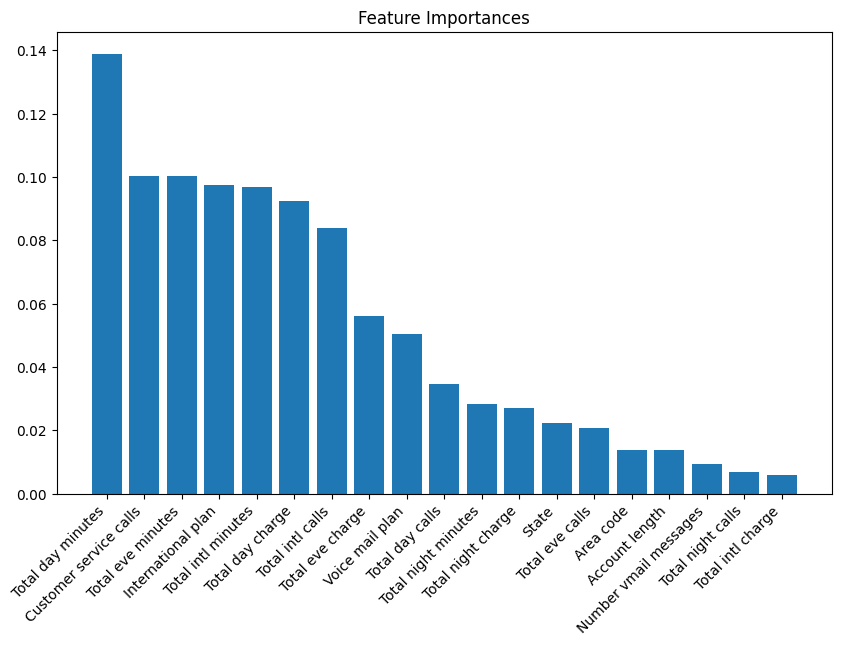

In [21]:
# Getting the decision tree classifier from the pipeline
decision_tree_classifier = DecisionTreeClassifier_pipeline_NF.named_steps['decisiontreeclassifier']

# Getting feature importances
feature_importances = decision_tree_classifier.feature_importances_

# Getting the corresponding feature names
feature_names = X_train.columns

# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Printing feature importances
print("Feature Importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=45, ha="right")
plt.title("Feature Importances")
plt.show()


In [22]:
# Saving Model
model_filename = './Saved-Model/DecisionTree-Models/DecisionTree_model_NF.joblib'
joblib.dump(DecisionTreeClassifier_pipeline_NF, model_filename)


model_info = pd.DataFrame({
    'ModelName': [model_filename]
})

csv_filename = './Saved-Model/DecisionTree-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='w', index=False)

## With Feature Engineering

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_F, y_F, test_size=0.2, random_state=42)
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

# Create a pipeline with DecisionTreeClassifier
DecisionTreeClassifier_pipeline_F = make_pipeline(PolynomialFeatures(degree=1), DecisionTreeClassifier(random_state=42))

# Cross-validate the pipeline
cv_scores = cross_val_score(DecisionTreeClassifier_pipeline_F, X_train, y_train, cv=10)

# Fit the pipeline on the training data
DecisionTreeClassifier_pipeline_F.fit(X_train, y_train)

# Make predictions on the test set
y_pred_binary = DecisionTreeClassifier_pipeline_F.predict(X_test)

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.9070294784580499
Recall: 0.9615384615384616
F1 Score: 0.9334889148191365
Accuracy: 0.9375


Feature Importances:
Total charge: 0.2860480876320749
International plan: 0.22617274542562388
Customer service calls: 0.18404127896354047
Total intl minutes: 0.04053208763875593
Number vmail messages: 0.03727262141251656
Total intl calls: 0.03371158479366915
Total day calls: 0.032060583275652206
Account length: 0.028937205112298362
Total day minutes: 0.024193463124201207
State: 0.022327998636669944
Total night calls: 0.02227111998502987
Area code: 0.018762016069006588
Total eve calls: 0.016961740772440653
Total night minutes: 0.010663260729993598
Voice mail plan: 0.01029675993544371
Total eve minutes: 0.005747446493082864
1: 0.0


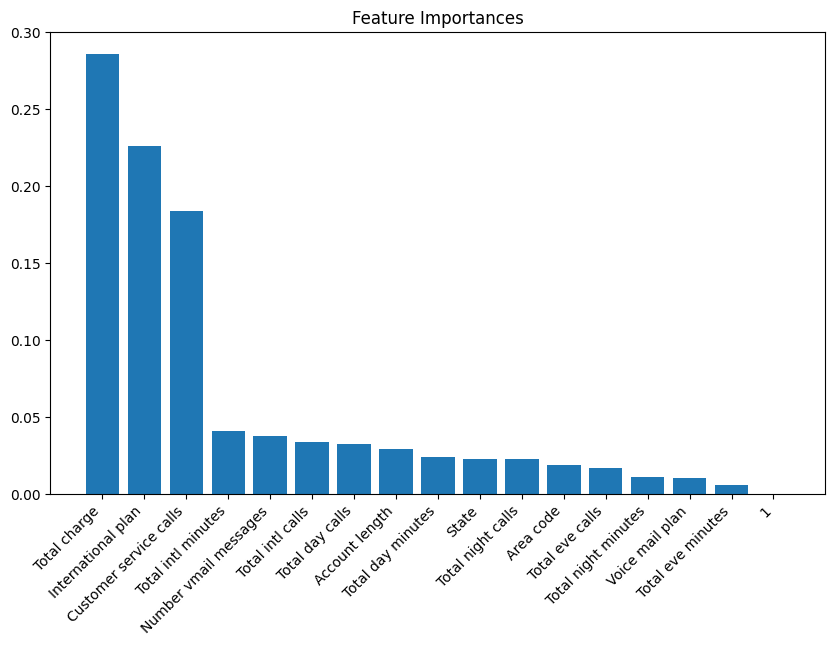

In [24]:
# Getting the decision tree classifier from the pipeline
decision_tree_classifier = DecisionTreeClassifier_pipeline_F.named_steps['decisiontreeclassifier']

# Getting feature importances
feature_importances = decision_tree_classifier.feature_importances_

# Getting the corresponding feature names
# Since PolynomialFeatures generates new features, you need to retrieve the feature names from it
feature_names = DecisionTreeClassifier_pipeline_F.named_steps['polynomialfeatures'].get_feature_names_out()

# Sort the features by importance in descending order
sorted_indices = feature_importances.argsort()[::-1]

# Printing feature importances
print("Feature Importances:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {feature_importances[i]}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=45, ha="right")
plt.title("Feature Importances")
plt.show()


In [25]:
# Saving Model
model_filename = './Saved-Model/DecisionTree-Models/DecisionTree_model_F.joblib'
joblib.dump(DecisionTreeClassifier_pipeline_F, model_filename)

model_info = pd.DataFrame({
    'ModelName': [model_filename]
})

csv_filename = './Saved-Model/DecisionTree-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='a', index=False,header=False)

# Neaural Netwroks

### Without Feature Engineering

In [26]:
# Creating a sequential model
Sequential_model_NF = Sequential()

# Level 1: 64 perceptrons, activation function= 'relu' taking 16 inputs
Sequential_model_NF.add(Dense(64, activation='relu', input_dim=19))

# Adding Dropout after the first layer
Sequential_model_NF.add(Dropout(0.2))  # Adjust dropout rate as needed

# Level 2: 6 perceptrons, activation function= 'relu'
Sequential_model_NF.add(Dense(32, activation='relu'))

# Level 2: 6 perceptrons, activation function= 'relu'
Sequential_model_NF.add(Dense(32, activation='relu'))

# Adding Dropout after the second layer
Sequential_model_NF.add(Dropout(0.2))  # Adjust dropout rate as needed

# Level 3: 3 perceptrons, activation function= 'relu'
Sequential_model_NF.add(Dense(16, activation='relu'))

# Level 4: 1 perceptron, activation function= 'sigmoid'
Sequential_model_NF.add(Dense(1, activation='sigmoid'))

# Compile the model with the custom optimizer
Sequential_model_NF.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Scale the input features
scaler = StandardScaler()
X_train_scaled_NF = scaler.fit_transform(X_NF)
X_val_scaled_NF = scaler.transform(X_val_NF)

# Convert labels to float32
y_NF_float32 = y_NF.astype('float32')
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = Sequential_model_NF.fit(X_train_scaled_NF, y_NF_float32, epochs=100, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100


2024-02-07 15:09:22.174170: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-07 15:09:22.174680: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


67/67 [==============================] - 1s 7ms/step - loss: 0.5751 - accuracy: 0.7331 - val_loss: 0.4789 - val_accuracy: 0.8258
Epoch 2/100
67/67 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8616 - val_loss: 0.4027 - val_accuracy: 0.8258
Epoch 3/100
67/67 [==============================] - 0s 3ms/step - loss: 0.3503 - accuracy: 0.8621 - val_loss: 0.3730 - val_accuracy: 0.8258
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.8630 - val_loss: 0.3530 - val_accuracy: 0.8333
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.8668 - val_loss: 0.3300 - val_accuracy: 0.8408
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 0.2903 - accuracy: 0.8785 - val_loss: 0.3121 - val_accuracy: 0.8596
Epoch 7/100
67/67 [==============================] - 0s 3ms/step - loss: 0.2862 - accuracy: 0.8879 - val_loss: 0.2957 - val_accuracy: 0.8764
Epoch 8/100
67/67 [======

In [27]:
# Make predictions on validation data
y_pred_proba = Sequential_model_NF.predict(X_val_scaled_NF)
y_pred = (y_pred_proba > 0.5).astype(int).reshape(-1)

# Calculate metrics
precision = precision_score(y_val_NF, y_pred)
recall = recall_score(y_val_NF, y_pred)
f1 = f1_score(y_val_NF, y_pred)
accuracy = accuracy_score(y_val_NF, y_pred)

# Print metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


21/21 [==============================] - 0s 1ms/step
Precision: 0.8734177215189873
Recall: 0.7263157894736842
F1 Score: 0.7931034482758621
Accuracy: 0.9460269865067467


In [28]:
np.savetxt("../Data/Clean-Data/X_validation_NF.csv", X_val_scaled_NF , delimiter=",")

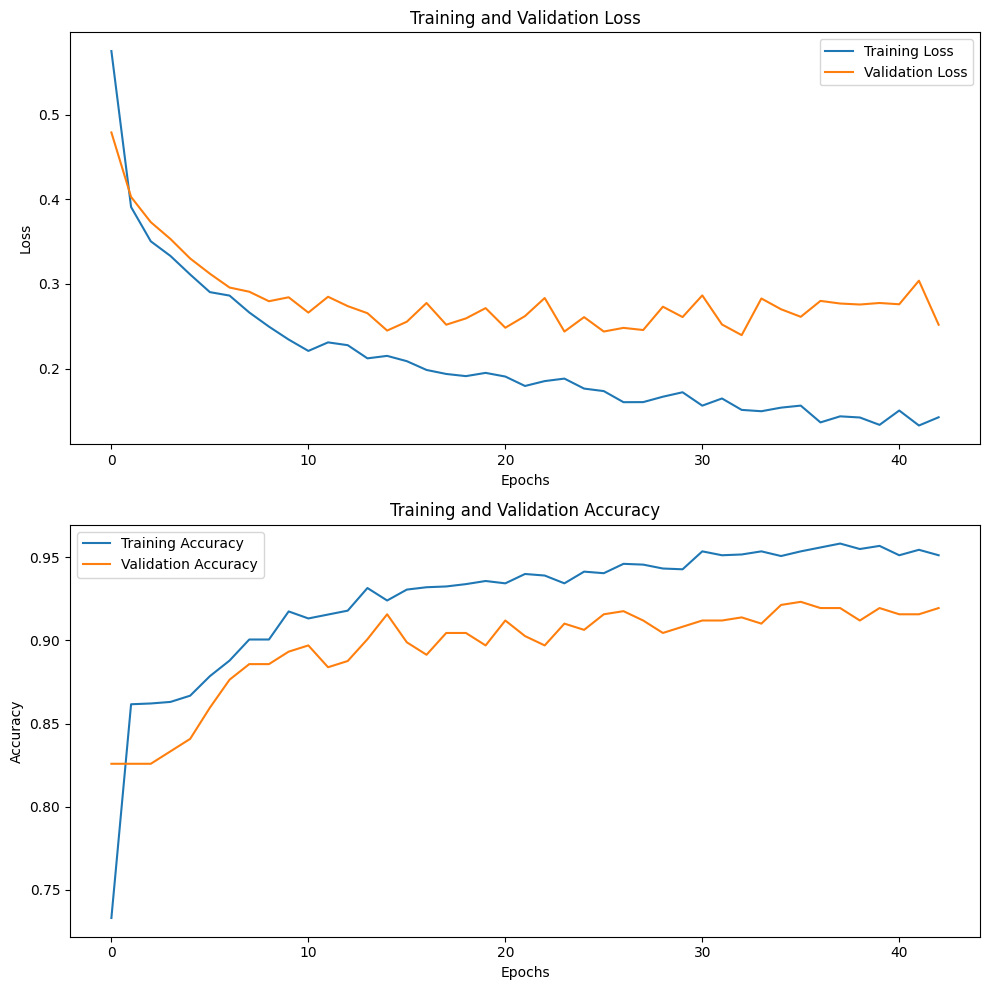

In [29]:
# Create two subplots (one for loss and one for accuracy)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Saving Model

In [30]:
model_filename = './Saved-Model/NauralNetwork-Models/NauralNetwork_NF.joblib'
joblib.dump(Sequential_model_NF, model_filename)

model_info = pd.DataFrame({
    'ModelName': [model_filename]
})

csv_filename = './Saved-Model/NauralNetwork-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='w', index=False,header=False)

### With Feature Engineering

In [31]:
# Creating a sequential model
Sequential_model_F = Sequential()

# Level 1: 64 perceptrons, activation function= 'relu' taking 16 inputs
Sequential_model_F.add(Dense(64, activation='relu', input_dim=16))

# Adding Dropout after the first layer
Sequential_model_F.add(Dropout(0.2))  # Adjust dropout rate as needed

# Level 2: 6 perceptrons, activation function= 'relu'
Sequential_model_F.add(Dense(32, activation='relu'))

# Level 2: 6 perceptrons, activation function= 'relu'
Sequential_model_F.add(Dense(32, activation='relu'))

# Adding Dropout after the second layer
Sequential_model_F.add(Dropout(0.2))  # Adjust dropout rate as needed

# Level 3: 3 perceptrons, activation function= 'relu'
Sequential_model_F.add(Dense(16, activation='relu'))

# Level 4: 1 perceptron, activation function= 'sigmoid'
Sequential_model_F.add(Dense(1, activation='sigmoid'))

# Compile the model with the custom optimizer
Sequential_model_F.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Scale the input features
scaler = StandardScaler()
X_train_scaled_F = scaler.fit_transform(X_F)
X_val_scaled_F = scaler.transform(X_val_F)

# Convert labels to float32
y_F_float32 = y_F.astype('float32')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = Sequential_model_F.fit(X_train_scaled_F, y_F_float32, epochs=100, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
114/114 [==============================] - 2s 6ms/step - loss: 0.5899 - accuracy: 0.6759 - val_loss: 0.7543 - val_accuracy: 0.6721
Epoch 2/100
114/114 [==============================] - 0s 3ms/step - loss: 0.4511 - accuracy: 0.7999 - val_loss: 0.5359 - val_accuracy: 0.8180
Epoch 3/100
114/114 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 0.8414 - val_loss: 0.4669 - val_accuracy: 0.8289
Epoch 4/100
114/114 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8584 - val_loss: 0.4967 - val_accuracy: 0.8026
Epoch 5/100
114/114 [==============================] - 0s 3ms/step - loss: 0.3168 - accuracy: 0.8735 - val_loss: 0.3412 - val_accuracy: 0.8651
Epoch 6/100
114/114 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8696 - val_loss: 0.2939 - val_accuracy: 0.8783
Epoch 7/100
114/114 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.8834 - val_loss: 0.3928 - val_accuracy: 0.8432

In [32]:
# Make predictions on validation data
y_pred_proba = Sequential_model_F.predict(X_val_scaled_F)
y_pred = (y_pred_proba > 0.5).astype(int).reshape(-1)

# Calculate metrics
precision = precision_score(y_val_F, y_pred)
recall = recall_score(y_val_F, y_pred)
f1 = f1_score(y_val_F, y_pred)
accuracy = accuracy_score(y_val_F, y_pred)

# Print metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


21/21 [==============================] - 0s 1ms/step
Precision: 0.7037037037037037
Recall: 0.8
F1 Score: 0.7487684729064039
Accuracy: 0.9235382308845578


In [33]:
np.savetxt("../Data/Clean-Data/X_validation_F.csv", X_val_scaled_F , delimiter=",")

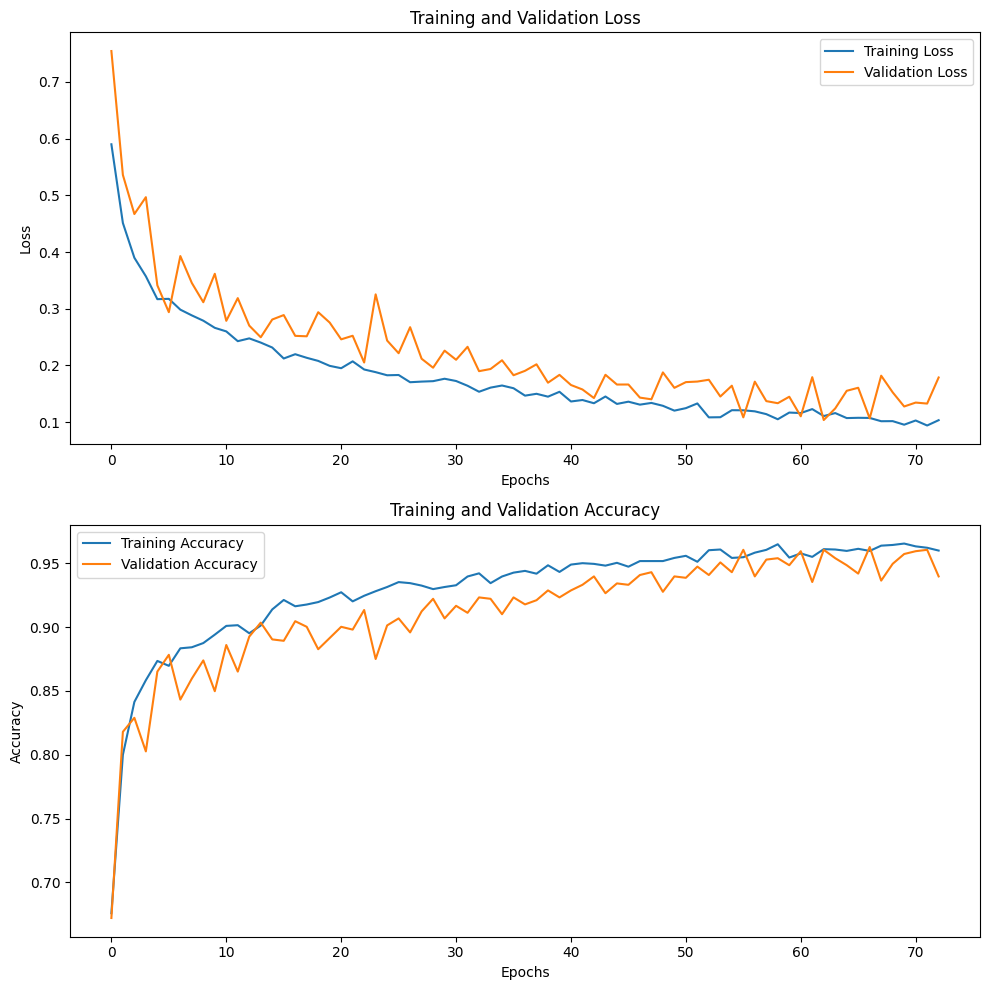

In [34]:
# Create two subplots (one for loss and one for accuracy)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# Plot training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

Saving Model

In [35]:
# Saving Model
model_filename = './Saved-Model/NauralNetwork-Models/NauralNetwork_F.joblib'
joblib.dump(Sequential_model_F, model_filename)

model_info = pd.DataFrame({
    'ModelName': [model_filename]
})

csv_filename = './Saved-Model/NauralNetwork-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='a', index=False,header=False)

# XGBoast

### Without Feature Engineering

In [36]:
# Splitting the dataset
X_train, X_test, y_train, y_test = X_NF, X_val_NF, y_NF, y_val_NF

# Creating XGBClassifier instance
bst = XGBClassifier(objective='binary:logistic', 
                    enable_categorical=True,
                    learning_rate=0.1,
                    max_depth=5,
                    n_estimators=2000,
                    min_child_weight=1,
                    subsample=1,
                    colsample_bytree=0.8,
                    gamma=0.2,
                    alpha=0,
                    scale_pos_weight=1
                    )

# Fit the model
bst.fit(X_train, y_train)

# Calculate accuracy on the test set
accuracy = bst.score(X_test, y_test)

# Predict on the test set
y_pred = bst.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.9375
Recall: 0.7894736842105263
F1 Score: 0.8571428571428571
Accuracy: 0.9625187406296851


In [37]:
feature_importances = bst.feature_importances_

# Creating a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_NF.columns,
    'Importance': feature_importances
})

# Printing the DataFrame
print(feature_importance_df.sort_values(by='Importance',ascending=False))

                   Feature  Importance
3       International plan    0.156149
18  Customer service calls    0.154239
8         Total day charge    0.101450
4          Voice mail plan    0.091901
16        Total intl calls    0.064612
6        Total day minutes    0.060100
11        Total eve charge    0.052195
15      Total intl minutes    0.051166
17       Total intl charge    0.043066
9        Total eve minutes    0.042358
14      Total night charge    0.032893
5    Number vmail messages    0.025046
12     Total night minutes    0.024773
13       Total night calls    0.019499
7          Total day calls    0.018145
10         Total eve calls    0.016656
0                    State    0.016113
1           Account length    0.015126
2                Area code    0.014515


Saving Model

In [38]:
model_filename = './Saved-Model/XGBoast-Models/XGBoast_model_NF.joblib'
joblib.dump(bst, model_filename)

model_info = pd.DataFrame({
    'ModelName': [model_filename]
})

csv_filename = './Saved-Model/XGBoast-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='w', index=False)

### With Feature Engineering

In [39]:


# Spliting the dataset
X_train, X_test, y_train, y_test = X_F,X_val_F,y_F,y_val_F

# Creating XGBClassifier instance
bst = XGBClassifier(objective='binary:logistic', 
                    enable_categorical=True,
                    learning_rate=0.1,
                    max_depth=5,
                    n_estimators=2000,
                    min_child_weight=1,
                    subsample=1,
                    colsample_bytree=0.8,
                    gamma=0.2,
                    alpha=0,
                    scale_pos_weight=1
                    )

# Perform random search on the training data
bst.fit(X_train, y_train)

# Calculate accuracy on the test set
accuracy = bst.score(X_test, y_test)

# Predict on the test set
y_pred = bst.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Precision: 0.9540229885057471
Recall: 0.8736842105263158
F1 Score: 0.9120879120879121
Accuracy: 0.9760119940029985


In [40]:
feature_importances = bst.feature_importances_

# Creating a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X_F.columns,
    'Importance': feature_importances
})

# Printing the DataFrame
print(feature_importance_df.sort_values(by='Importance',ascending=False))


                   Feature  Importance
3       International plan    0.225606
14  Customer service calls    0.203161
15            Total charge    0.149162
4          Voice mail plan    0.131671
13        Total intl calls    0.056399
2                Area code    0.050452
12      Total intl minutes    0.027698
0                    State    0.022689
6        Total day minutes    0.019066
8        Total eve minutes    0.018182
7          Total day calls    0.017675
11       Total night calls    0.017002
10     Total night minutes    0.016171
5    Number vmail messages    0.015954
1           Account length    0.014915
9          Total eve calls    0.014198


Saving Model

In [41]:
model_filename = './Saved-Model/XGBoast-Models/XGBoast_model_F.joblib'
joblib.dump(bst, model_filename)

model_info = pd.DataFrame({
    'ModelName': [model_filename]
})

csv_filename = './Saved-Model/XGBoast-Models/model_info.csv'
model_info.to_csv(csv_filename, mode='a', index=False,header=False)

# RandomForest Model

## Without Feature Engineering

In [42]:
dataset_df=pd.concat([X_NF,y_NF],axis=1)
dataset_df_test=pd.concat([X_val_NF,y_val_NF],axis=1)

# Converting the Pandas dataframe to a tf dataset
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="Churn")
tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df_test, label="Churn")

model = tfdf.keras.RandomForestModel()

model.fit(tf_dataset)

# Predictions on the test dataset
predictions = model.predict(tf_test_dataset)

# Convert predictions to binary labels
binary_predictions = (predictions > 0.5).astype(int)

# Extract true labels from the test dataset
true_labels = dataset_df_test["Churn"].astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)
accuracy = accuracy_score(true_labels, binary_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Use /tmp/tmprst2y9if as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.807810. Found 2666 examples.
Training model...


[INFO 24-02-07 15:10:06.1711 PKT kernel.cc:1233] Loading model from path /tmp/tmprst2y9if/model/ with prefix 97d0eede11654a0c


Model trained in 0:00:00.855530
Compiling model...


[INFO 24-02-07 15:10:06.4460 PKT decision_forest.cc:660] Model loaded with 300 root(s), 58728 node(s), and 19 input feature(s).
[INFO 24-02-07 15:10:06.4461 PKT abstract_model.cc:1344] Engine "RandomForestOptPred" built
[INFO 24-02-07 15:10:06.4461 PKT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 72ms/step
Precision: 0.9324324324324325
Recall: 0.7263157894736842
F1 Score: 0.8165680473372781
Accuracy: 0.9535232383808095


Saving Model

In [43]:
# Save the trained model
model.save("../Model-Notebooks/Saved-Model/RandomForest-Models/random_forest_model_NF")

INFO:tensorflow:Assets written to: ../Model-Notebooks/Saved-Model/RandomForest-Models/random_forest_model_NF/assets


INFO:tensorflow:Assets written to: ../Model-Notebooks/Saved-Model/RandomForest-Models/random_forest_model_NF/assets


## With Feature Engineering

In [44]:
dataset_df=pd.concat([X_F,y_F],axis=1)
dataset_df_test=pd.concat([X_val_F,y_val_F],axis=1)

# Converting the Pandas dataframe to a tf dataset
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df, label="Churn")
tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset_df_test, label="Churn")

model = tfdf.keras.RandomForestModel()


model.fit(tf_dataset,fix_feature_names=False)

# Predictions on the test dataset
predictions = model.predict(tf_test_dataset)

# Convert predictions to binary labels
binary_predictions = (predictions > 0.5).astype(int)

# Extract true labels from the test dataset
true_labels = dataset_df_test["Churn"].astype(int)

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)
accuracy = accuracy_score(true_labels, binary_predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")



Use /tmp/tmpxfevrrx8 as temporary training directory


Reading training dataset...
Training dataset read in 0:00:00.303881. Found 4556 examples.
Training model...


[INFO 24-02-07 15:10:08.8040 PKT kernel.cc:1233] Loading model from path /tmp/tmpxfevrrx8/model/ with prefix 3a68832f71374110


Model trained in 0:00:01.013493
Compiling model...


[INFO 24-02-07 15:10:09.1475 PKT decision_forest.cc:660] Model loaded with 300 root(s), 81624 node(s), and 16 input feature(s).
[INFO 24-02-07 15:10:09.1475 PKT kernel.cc:1061] Use fast generic engine


Model compiled.
1/1 [==============================] - 0s 61ms/step
Precision: 0.9761904761904762
Recall: 0.8631578947368421
F1 Score: 0.9162011173184358
Accuracy: 0.9775112443778111


Saving Model

In [45]:
# Save the trained model
model.save("../Model-Notebooks/Saved-Model/RandomForest-Models/random_forest_model_F")

INFO:tensorflow:Assets written to: ../Model-Notebooks/Saved-Model/RandomForest-Models/random_forest_model_F/assets


INFO:tensorflow:Assets written to: ../Model-Notebooks/Saved-Model/RandomForest-Models/random_forest_model_F/assets
